# Feature Extraction

## Please read:
1. Before running any cell in this document, ensure that there is a path-to-file.csv in Cell 11. If you cloned the whole repository, then you can leave this as written and it will create and append to an extracted_data.csv in the data folder. This file holds the data extracted for each image. That data is written to a pandas data frame in Cell 10. Subsequently running Cell 11 appends all the extracted features to file. **The dictionary holding the extracted data during processing is a holder and gets overwritten for each image, so not running Cell 10 and Cell 11 after successful processing of an image means all that data gets lost.**
2. The first four code cells are for setup, and barring any errors, should only need to be run once in an annotation session.
3. Follow the instructions for collection of the image file paths into a text document. This should allow you to step through every image in the file just by executing Cell 5. Execution of this cell also removes the first file from the list.
4. If there is an error processing a certain image, Cell 6 is provided (which is commented out) that will allow you to place the image file path to the end of the list. Remember to comment this cell out again after use.
5. If you need to end before the processing of all the files in the list, Cell 7 is provided (which is commented out) that will allow you to save the remaining files in the list to another text file in the current directory. When you are ready to resume, put that file in the open() function in Cell 4. Remember to comment this cell out again after use.

![imgflow](../images/notebook_images/imgflow.png)

In [1]:
# %% Cell 1
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from objectmapping import ObjectMapping
from mrcnn_classes import class_names
from itertools import permutations
from collections import defaultdict
import os

Using TensorFlow backend.


In [2]:
%%time
# %% Cell 2
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True);

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
CPU times: user 10.3 s, sys: 724 ms, total: 11 s
Wall time: 10.9 s


In [3]:
# %% Cell 3
def area_from_box(h1, w1, h2, w2):
        return abs(h1-h2)*abs(w1-w2)
    
def depth_response(a, b):
    while True:
        print('\n')
        print(f"Are objects {a} and {b} at the same depth level?")        
        print("0: no")
        print("1: yes")
        response = input()
        if response == '1':
            break
        elif response == '0':
            break
    return int(response)

def frontbehind_response(a, b):
    while True:
        print('\n')
        print(f"If touching, is object {a} in front of or behind {b}?")        
        print("0: behind")
        print("1: in front")
        print("2: neither or not touching")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
        elif response == '2':
            break
    return int(response)

def invson_response(a, b):
    while True:
        print('\n')
        print(f"Is object {a} in object {b}?")        
        print("0: no")
        print("1: yes")
        response = input()
        if response == '0':
            break
        elif response == '1':
            break
    return int(response)


### Reading images from list on Windows
1. Open the folder that has the images
2. Select all (ctrl+a)
3. Press shift and right click in the folder
4. Select 'copy as path' from menu
5. Create a text file with a unique name
6. Open the text file and paste in the file paths (ctrl+v)
7. Save the file

It is also recommended to copy the the text, rename one copy **session.txt** and place **session.txt** in the source folder. Cell 7 can be used to take a session break by writing out the remaining items in the image list effectively overwriting the **session.txt** file.

In [4]:
# %% Cell 4
with open('session.txt', 'r') as f:
    image_list = f.read().splitlines()
image_list = [i.strip('\"') for i in image_list]

<a id='input'></a>
### Start loading of next image from here by executing the following pop command:

In [5]:
# %% Cell 5
image_filename = image_list.pop(0)

#### If the image has an error during processing, uncomment the below cell and run. Then execute the above cell to pop the next image file. Don't forget re-comment out the cell below after running the cell. This just puts the filename to the end of the list.
comment shortcut: ctrl + /

In [7]:
# %% Cell 6
# image_list.append(image_filename)

#### If you need to stop before finishing the processing of the list, you can write the remaining files in the list back out to a text file by uncommenting and running the next cell. Then when you're ready to resume, execute Cells 1-4, but make sure that the file being opened in Cell 4, is the same one written to in Cell 7.
comment shortcut: ctrl + /

In [8]:
# %% Cell 7
# with open('session.txt', 'w') as f:
#     for i in image_list:
#         f.write(f"{i}\n")

In [6]:
# %% Cell 8
#load image
imagefile = image_filename
img = load_img(imagefile)
img_array = img_to_array(img)
# make prediction
results = rcnn.detect([img_array], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
imap = ObjectMapping(imagefile, r, class_names)

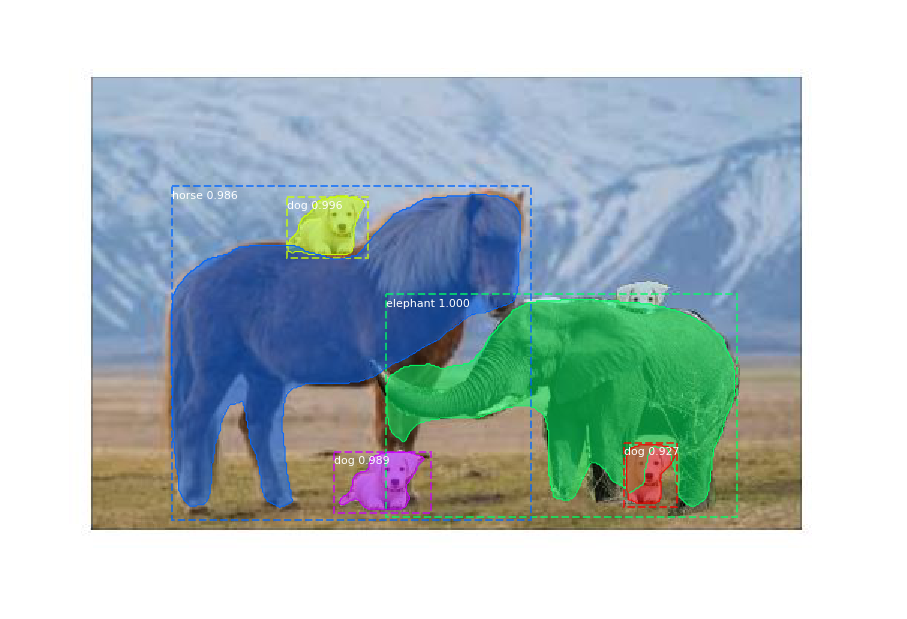



Are objects 1 and 2 at the same depth level?
0: no
1: yes
1




If touching, is object 1 in front of or behind 2?
0: behind
1: in front
2: neither or not touching
2


Is object 1 in object 2?
0: no
1: yes
0


Are objects 1 and 3 at the same depth level?
0: no
1: yes
1




If touching, is object 1 in front of or behind 3?
0: behind
1: in front
2: neither or not touching
2


Is object 1 in object 3?
0: no
1: yes
0


Are objects 1 and 4 at the same depth level?
0: no
1: yes
1




If touching, is object 1 in front of or behind 4?
0: behind
1: in front
2: neither or not touching
2


Is object 1 in object 4?
0: no
1: yes
0


Are objects 1 and 5 at the same depth level?
0: no
1: yes
1




If touching, is object 1 in front of or behind 5?
0: behind
1: in front
2: neither or not touching
1


Is object 1 in object 5?
0: no
1: yes
0


Are objects 2 and 1 at the same depth level?
0: no
1: yes
1




If touching, is object 2 in front of or behind 1?
0: behind
1: in front
2: neither or not touching

In [8]:
# %% Cell 9
if imap.total_objects <= 1:
    print('Not enough objects detected.')        
else:
    image_data = defaultdict(list)
    object_bb = {}
    object_mb = {}
    areas_bb = {}
    areas_mb = {}
    object_pixels = {}
    ids = []
    
    for i in range(1, imap.total_objects+1):
        object_bb[i] = imap.get_box(i)
        object_mb[i] = imap.mass_box(i)
        object_pixels[i] = imap.mask_pixel_count(i)
        ids.append(i)
        areas_bb[i] = area_from_box(*object_bb[i])
        areas_mb[i] = area_from_box(*object_mb[i])
    
    ids = [i for i in ids if i < 6] # Limits the objects detected to 5.
    image_area = imap.img_height*imap.img_width
    ptot_bb_area = sum(areas_bb.values())
    ptot_mb_area = sum(areas_mb.values())
    ptot_mask_pixels = sum(object_pixels.values())
    
    display_instances(img_array, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
    object_combos = permutations(ids, r=2)
    for a, b in object_combos:
        # Overall image data
        image_data['filename'].append(imap.filename)
        image_data['image height'].append(imap.img_height)
        image_data['image width'].append(imap.img_width)
        image_data['total objects'].append(imap.total_objects)
        image_data['% total pixels'].append(ptot_mask_pixels/image_area)
        image_data['% total bb area'].append(ptot_bb_area/image_area)
        image_data['% total mb area'].append(ptot_mb_area/image_area)
        
        # Object A relationship to image
        image_data['objectA'].append(imap.object_class(a))
        image_data['A % bb area'].append(areas_bb[a]/image_area)
        image_data['A % mb area'].append(areas_mb[a]/image_area)
        image_data['A diff bbmb image area'].append(image_data['A % bb area'][-1]-\
                                                  image_data['A % mb area'][-1])
        image_data['A % bb area of sum bb'].append(areas_bb[a]/ptot_bb_area)
        image_data['A % mb area of sum mb'].append(areas_mb[a]/ptot_mb_area)
        image_data['A diff bbmb box area'].append(image_data['A % bb area of sum bb'][-1]-\
                                                  image_data['A % mb area of sum mb'][-1])
        image_data['A % top bb'].append(object_bb[a][0]/imap.img_height)
        image_data['A % left bb'].append(object_bb[a][1]/imap.img_width)
        image_data['A % bottom bb'].append(object_bb[a][2]/imap.img_height)
        image_data['A % right bb'].append(object_bb[a][3]/imap.img_width)
        image_data['A % top mb'].append(object_mb[a][0]/imap.img_height)
        image_data['A % left mb'].append(object_mb[a][1]/imap.img_width)
        image_data['A % bottom mb'].append(object_mb[a][2]/imap.img_height)
        image_data['A % right mb'].append(object_mb[a][3]/imap.img_width)
        image_data['A % pixels of image area'].append(object_pixels[a]/image_area)
        image_data['A % pixels of bb area'].append(object_pixels[a]/areas_bb[a])
        image_data['A % pixels of mb area'].append(object_pixels[a]/areas_mb[a])
        image_data['A % pixels of total pixels'].append(object_pixels[a]/ptot_mask_pixels)
        image_data['A % bb height'].append(abs(object_bb[a][0]-object_bb[a][2])/imap.img_height)
        image_data['A % bb width'].append(abs(object_bb[a][1]-object_bb[a][3])/imap.img_width)
        image_data['A % mb height'].append(abs(object_mb[a][0]-object_mb[a][2])/imap.img_height)
        image_data['A % mb width'].append(abs(object_mb[a][1]-object_mb[a][3])/imap.img_width)
        
        # Object B relationship to image
        image_data['objectB'].append(imap.object_class(b))
        image_data['B % bb area'].append(areas_bb[b]/image_area)
        image_data['B % mb area'].append(areas_mb[b]/image_area)
        image_data['B diff bbmb image area'].append(image_data['B % bb area'][-1]-\
                                                  image_data['B % mb area'][-1])
        image_data['B % bb area of sum bb'].append(areas_bb[b]/ptot_bb_area)
        image_data['B % mb area of sum mb'].append(areas_mb[b]/ptot_mb_area)
        image_data['B diff bbmb box area'].append(image_data['B % bb area of sum bb'][-1]-\
                                                  image_data['B % mb area of sum mb'][-1])
        image_data['B % top bb'].append(object_bb[b][0]/imap.img_height)
        image_data['B % left bb'].append(object_bb[b][1]/imap.img_width)
        image_data['B % bottom bb'].append(object_bb[b][2]/imap.img_height)
        image_data['B % right bb'].append(object_bb[b][3]/imap.img_width)
        image_data['B % top mb'].append(object_mb[b][0]/imap.img_height)
        image_data['B % left mb'].append(object_mb[b][1]/imap.img_width)
        image_data['B % bottom mb'].append(object_mb[b][2]/imap.img_height)
        image_data['B % right mb'].append(object_mb[b][3]/imap.img_width)
        image_data['B % pixels of image area'].append(object_pixels[b]/image_area)
        image_data['B % pixels of bb area'].append(object_pixels[b]/areas_bb[b])
        image_data['B % pixels of mb area'].append(object_pixels[b]/areas_mb[b])
        image_data['B % pixels of total pixels'].append(object_pixels[b]/ptot_mask_pixels)
        image_data['B % bb height'].append(abs(object_bb[b][0]-object_bb[b][2])/imap.img_height)
        image_data['B % bb width'].append(abs(object_bb[b][1]-object_bb[b][3])/imap.img_width)
        image_data['B % mb height'].append(abs(object_mb[b][0]-object_mb[b][2])/imap.img_height)
        image_data['B % mb width'].append(abs(object_mb[b][1]-object_mb[b][3])/imap.img_width)
        
        # Object A relationship to Object B
        image_data['diffAB % bb area'].append(image_data['A % bb area'][-1]-image_data['B % bb area'][-1])
        image_data['diffAB % mb area'].append(image_data['A % mb area'][-1]-image_data['B % mb area'][-1])
        image_data['diffAB diff bbmb image area'].append(image_data['A diff bbmb image area'][-1]-\
                                                  image_data['B diff bbmb image area'][-1])
        image_data['diffAB % bb area of sum bb'].append(image_data['A % bb area of sum bb'][-1]-\
                                                        image_data['B % bb area of sum bb'][-1])
        image_data['diffAB % mb area of sum mb'].append(image_data['A % mb area of sum mb'][-1]-\
                                                        image_data['B % mb area of sum mb'][-1])
        image_data['diffAB diff bbmb box area'].append(image_data['A diff bbmb box area'][-1]-\
                                                  image_data['B diff bbmb box area'][-1])
        image_data['diffAB % top bb'].append(image_data['A % top bb'][-1]-image_data['B % top bb'][-1])
        image_data['diffAB % left bb'].append(image_data['A % left bb'][-1]-image_data['B % left bb'][-1])
        image_data['diffAB % bottom bb'].append(image_data['A % bottom bb'][-1]-image_data['B % bottom bb'][-1])
        image_data['diffAB % right bb'].append(image_data['A % right bb'][-1]-image_data['B % right bb'][-1])
        image_data['diffAB % top mb'].append(image_data['A % top mb'][-1]-image_data['B % top mb'][-1])
        image_data['diffAB % left mb'].append(image_data['A % left mb'][-1]-image_data['B % left mb'][-1])
        image_data['diffAB % bottom mb'].append(image_data['A % bottom mb'][-1]-image_data['B % bottom mb'][-1])
        image_data['diffAB % right mb'].append(image_data['A % right mb'][-1]-image_data['B % right mb'][-1])
        image_data['diffAB % pixels of image area'].append(image_data['A % pixels of image area'][-1]-\
                                                           image_data['B % pixels of image area'][-1])
        image_data['diffAB % pixels of bb area'].append(image_data['A % pixels of bb area'][-1]-\
                                                       image_data['B % pixels of bb area'][-1])
        image_data['diffAB % pixels of mb area'].append(image_data['A % pixels of mb area'][-1]-\
                                                       image_data['B % pixels of mb area'][-1])
        image_data['diffAB % pixels of total pixels'].append(image_data['A % pixels of total pixels'][-1]-\
                                                            image_data['B % pixels of total pixels'][-1])
        image_data['diffAB % bb height'].append(image_data['A % bb height'][-1]-image_data['B % bb height'][-1])
        image_data['diffAB % bb width'].append(image_data['A % bb width'][-1]-image_data['B % bb width'][-1])
        image_data['diffAB % mb height'].append(image_data['A % mb height'][-1]-image_data['B % mb height'][-1])
        image_data['diffAB % mb width'].append(image_data['A % mb width'][-1]-image_data['B % mb width'][-1])
        
        atruebox = imap.create_box_mask(*object_mb[a])
        btruebox = imap.create_box_mask(*object_mb[b])
        overlapbox = np.bitwise_and(atruebox, btruebox) 
        image_data['AB % massbox overlap'].append(np.sum(overlapbox)/areas_mb[a])
        
        maska = imap.get_mask(a).copy()
        maskb = imap.get_mask(b).copy()
        toplinea = imap.object_topline(a)
        toplineb = imap.object_topline(b)
        image_data['a_on_b'].append(np.any(np.bitwise_and(maska, toplineb)))
        image_data['b_on_a'].append(np.any(np.bitwise_and(maskb, toplinea))) 
        
        imap.object_outline(a,b, show_id=True).show()
        depth = depth_response(a,b)
        if depth == 1:
            image_data['same depth'].append(depth)
            print('\n')
            image_data['frontbehind'].append(frontbehind_response(a,b))
            image_data['a in b'].append(invson_response(a,b))
        else:
            image_data['same depth'].append(depth)
            image_data['frontbehind'].append(2)
            image_data['a in b'].append(0)
            

[Back to image input](#input)

In [9]:
# %% Cell 10
if len(image_data) == 81:
    df = pd.DataFrame.from_dict(image_data)
else:
    print("Double-check dictionary size. There should be 81 key:value combinations.")
df

,filename,image height,image width,total objects,% total pixels,% total bb area,% total mb area,objectA,A % bb area,A % mb area,...,diffAB % bb height,diffAB % bb width,diffAB % mb height,diffAB % mb width,AB % massbox overlap,a_on_b,b_on_a,same depth,frontbehind,a in b
0,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.281250,0.312500,0.213542,0.210069,0.000000,False,False,1,2,0
1,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.281250,0.293403,0.213542,0.206597,0.000000,False,False,1,2,0
2,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,-0.192708,-0.010417,-0.018229,-0.123264,0.070231,False,False,1,2,0
3,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.276042,0.345486,0.210938,0.234375,0.031447,True,False,1,1,0
4,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.281250,-0.312500,-0.213542,-0.210069,0.000000,False,False,1,2,0
5,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,0.000000,-0.019097,0.000000,-0.003472,0.000000,False,False,1,2,0
6,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.473958,-0.322917,-0.231771,-0.333333,0.736842,True,False,1,2,0
7,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.005208,0.032986,-0.002604,0.024306,0.000000,False,False,1,2,0
8,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.012049,0.006872,...,-0.281250,-0.293403,-0.213542,-0.206597,0.000000,False,False,1,2,0
9,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.012049,0.006872,...,0.000000,0.019097,0.000000,0.003472,0.000000,False,False,1,2,0


# Warning: running the following cell writes the dataframe to file. Do not run if there was a processing error or there were not enough objects detected. This will just duplicate the previous data in the file.

In [10]:
# %% Cell 11
if df.shape[1] == 81:
    df.to_csv('../data/sessions/extracted_data.csv', mode='a',
              header=not os.path.isfile('../data/sessions/extracted_data.csv'), index=False)
else:
    print("Double-check dataframe dimension.")

[Back to image input](#input)

In [11]:
# %% Cell 12
checkcsv = pd.read_csv('../data/sessions/extracted_data.csv')
checkcsv

,filename,image height,image width,total objects,% total pixels,% total bb area,% total mb area,objectA,A % bb area,A % mb area,...,diffAB % bb height,diffAB % bb width,diffAB % mb height,diffAB % mb width,AB % massbox overlap,a_on_b,b_on_a,same depth,frontbehind,a in b
0,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.281250,0.312500,0.213542,0.210069,0.000000,False,False,1,2,0
1,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.281250,0.293403,0.213542,0.206597,0.000000,False,False,1,2,0
2,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,-0.192708,-0.010417,-0.018229,-0.123264,0.070231,False,False,1,2,0
3,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,elephant,0.157633,0.086263,...,0.276042,0.345486,0.210938,0.234375,0.031447,True,False,1,1,0
4,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.281250,-0.312500,-0.213542,-0.210069,0.000000,False,False,1,2,0
5,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,0.000000,-0.019097,0.000000,-0.003472,0.000000,False,False,1,2,0
6,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.473958,-0.322917,-0.231771,-0.333333,0.736842,True,False,1,2,0
7,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.010010,0.006529,...,-0.005208,0.032986,-0.002604,0.024306,0.000000,False,False,1,2,0
8,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.012049,0.006872,...,-0.281250,-0.293403,-0.213542,-0.206597,0.000000,False,False,1,2,0
9,/home/jartav/Documents/SMU/6130/Git6130/Capsto...,384,576,5,0.211326,0.428467,0.235957,dog,0.012049,0.006872,...,0.000000,0.019097,0.000000,0.003472,0.000000,False,False,1,2,0


[Back to image input](#input)